In [1]:
import tensorflow as tf

### New section

In [49]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-11-16 12:23:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   141MB/s    in 0.7s    

2022-11-16 12:23:06 (141 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [50]:
!ls pizza_steak

test  train


In [51]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [52]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5758 - accuracy: 0.6867 - val_loss: 0.4116 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4143 - accuracy: 0.8153 - val_loss: 0.3410 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3921 - accuracy: 0.8247 - val_loss: 0.3417 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3476 - accuracy: 0.8560 - val_loss: 0.2991 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3187 - accuracy: 0.8687 - val_loss: 0.2983 - val_accuracy: 0.8780


In [ ]:
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

In [ ]:
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

In [ ]:
model_3.summary()

In [ ]:
!nvidia-smi

In [ ]:
trian_dir='pizza_steak/train/'
test_dir='pizza_steak/test/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          batch_size=32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model_4=Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding='valid',
          activation='relu',
          input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_4.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history_4=model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  accuracy=history.history['accuracy']
  val_loss=history.history['val_loss']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs,loss,label='training loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()


  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()  


In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5=Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding='valid',
          activation='relu',
          input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
histroy_5=model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

In [ ]:
model_5.summary()

In [ ]:
plot_loss_curves(histroy_5)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print('augemented tarining images')
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=False)
print('non-aigemted training images')
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                             shuffle=False)
print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

In [ ]:
import random

In [ ]:
rand_num=random.randint(0,32)
plt.imshow(images[rand_num])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[rand_num])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model_6=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')

])
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6=model_6.fit(train_data_augmented,epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_6)

In [ ]:
print('augemented shuffld tarining images')
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=True)

In [ ]:
model_7=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7=model_7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

In [ ]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak=mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
steak=load_and_prep_image("03-steak.jpeg")
steak

In [ ]:
steak=tf.expand_dims(steak,axis=0)
steak.shape

In [ ]:
pred = model_1.predict(steak)
pred

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

In [ ]:
class_names

In [ ]:
pred_class=class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_plot(model,filename,class_names):
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis(False)

In [ ]:
pred_plot(model_1,'03-steak.jpeg',class_names)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_plot(model_1, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 64ms/step


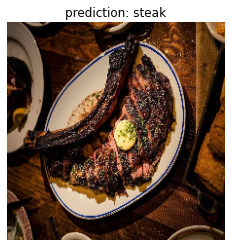

In [55]:
# loadind a random image from internet to test.

pred_plot(model_1,"/content/stanselm.41.jpg",class_names)